<a href="https://colab.research.google.com/github/safrints/house-price-prediction-ml/blob/main/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HOUSE PRICE PREDICTION**

---



## **INTRODUCTION**

* House Price Prediction uses machine learning to estimate property values based on features like location, area, and number of rooms.

* Accurate price prediction is essential for buyers, sellers, real estate agents, and financial institutions to make informed decisions.

* Traditional manual pricing methods often rely on subjective judgment, which can lead to inconsistencies.

* Machine learning provides a data-driven approach that identifies patterns and relationships in historical housing data.

* The project begins with collecting and preprocessing data, including handling missing values and outliers.

* Exploratory Data Analysis (EDA) is performed to understand the impact of different features on house prices.

* Feature engineering and selection are applied to improve model performance and reduce complexity.

* Various algorithms such as Linear Regression, Decision Tree, Random Forest, or Support Vector Regression (SVR) can be used to build predictive models.

* Model evaluation uses metrics like Mean Squared Error (MSE) and R² score to assess accuracy.

* The project demonstrates how machine learning can provide reliable, objective, and actionable insights for the real estate market.

## **DATA COLLECTION**


Load dataset from a CSV file from Google Drive.To access data from drive mount Google Drive to Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/dataset/Housing.csv")

## **DATA PROCESSING**

Clean the data:
- Handle missing values
- Remove duplicates
- Encode categorical data
- Scale numerical data

In [ ]:
#to find informations of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# to find duplicates values
#data.duplicated()
data.duplicated().sum()

np.int64(0)

### Encode Categorial Value





In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [ ]:
data['mainroad'] = Le.fit_transform(data['mainroad'])
data['guestroom'] = Le.fit_transform(data['guestroom'])
data['basement'] = Le.fit_transform(data['basement'])
data['hotwaterheating'] = Le.fit_transform(data['hotwaterheating'])
data['airconditioning'] = Le.fit_transform(data['airconditioning'])
data['prefarea'] = Le.fit_transform(data['prefarea'])
data['furnishingstatus'] = Le.fit_transform(data['furnishingstatus'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


### Scale numerical data

## **EXPLORATORY DATA ANALYSIS  (EDA)**

### CORRELATION

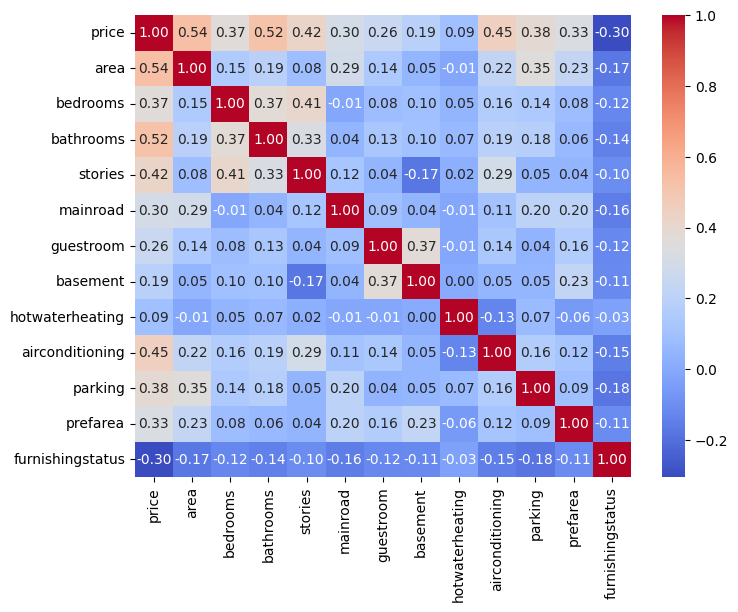

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.show()


### FEATURE SELECTION

In [ ]:
x = data.drop("price", axis=1)
y = data["price"]


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
bestfeatures = SelectKBest(score_func=f_regression, k=5)
fit = bestfeatures.fit(x, y)

In [ ]:
print(fit.scores_)

[218.88408118  84.25102178 198.65452062 116.78040217  52.49183918
  37.92827585  19.68856916   4.74486966 140.16272089  94.14332782
  66.25864622  55.58137479]


### MODEL SPLITING FOR TRAINING AND TESTING

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

## **MODEL SELECTION AND TRAINING**

### LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model = LinearRegression()
linear_model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
linear_ypred = linear_model.predict(xtest)

In [ ]:
from sklearn.metrics import r2_score
print("R² Score:", r2_score(ytest, linear_ypred))

R² Score: 0.6494754192267803


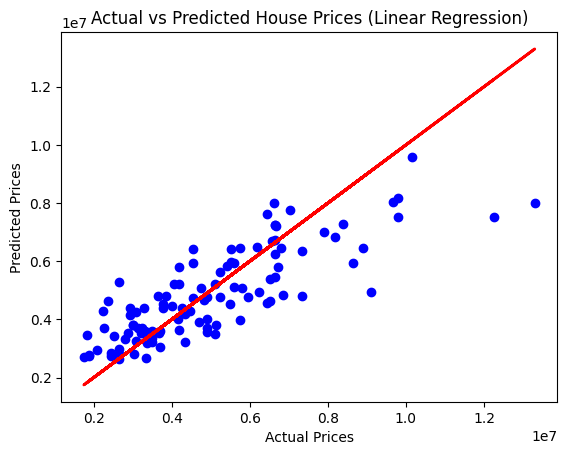

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(ytest, linear_ypred, color='blue')   # scatter plot
plt.plot(ytest, ytest, color='red', linewidth=2) # perfect line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Linear Regression)")
plt.show()


### DESCISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [ ]:
DecisionTree_ypred = DecisionTree_model.predict(xtest)

In [ ]:
from sklearn.metrics import r2_score
print("R² Score:", r2_score(ytest, DecisionTree_ypred))

R² Score: 0.428731840128733


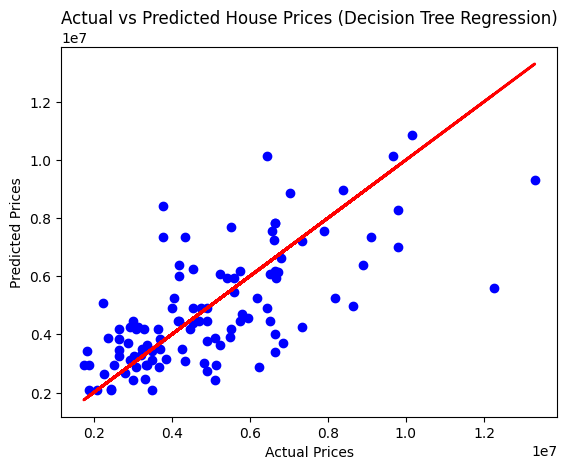

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(ytest, DecisionTree_ypred, color='blue')   # scatter plot
plt.plot(ytest, ytest, color='red', linewidth=2) # perfect line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Decision Tree Regression)")
plt.show()

### RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RandomForest_model = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
RandomForest_model.fit(xtrain,ytrain)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [ ]:
RandomForest_ypred = RandomForest_model.predict(xtest)

In [ ]:
from sklearn.metrics import r2_score
print("R² Score:", r2_score(ytest, RandomForest_ypred))

R² Score: 0.642967468999922


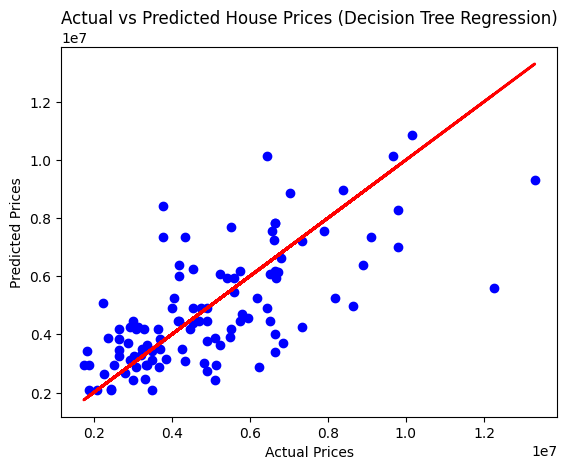

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(ytest, DecisionTree_ypred, color='blue')   # scatter plot
plt.plot(ytest, ytest, color='red', linewidth=2) # perfect line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Decision Tree Regression)")
plt.show()

### SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
SVR_model = SVR()
SVR_model.fit(xtrain,ytrain)

SVR()

In [ ]:
SVR_model_ypred = SVR_model.predict(xtest)

In [ ]:
from sklearn.metrics import r2_score
print("R² Score:", r2_score(ytest, SVR_model_ypred))

R² Score: -0.10156389053848902


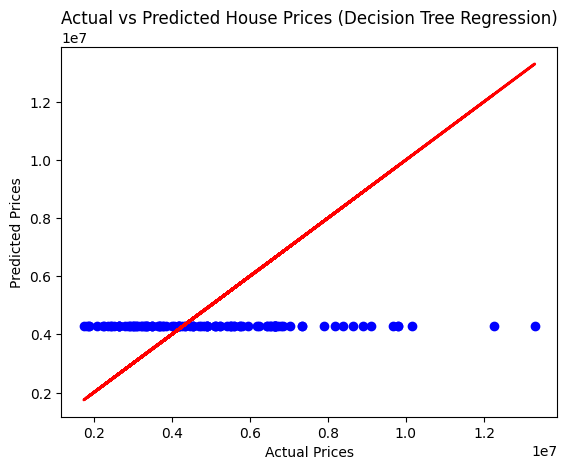

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(ytest, SVR_model_ypred, color='blue')   # scatter plot
plt.plot(ytest, ytest, color='red', linewidth=2) # perfect line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Decision Tree Regression)")
plt.show()

## **CONCLUSION**

Linear Regression provides a simple and interpretable model that works well when relationships between variables are linear. However, it struggles with complex, non-linear patterns in the data. Random Forest Regression, being an ensemble method, captures such non-linear relationships and usually achieves higher prediction accuracy. While Random Forest is less interpretable and more computationally intensive, it offers better performance and robustness. Overall, Linear Regression is ideal for simplicity, whereas Random Forest is preferred for accuracy.